--- Data Overview ---
   Variance  Skewness  Curtosis  Entropy  Class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0

--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Variance  1372 non-null   float64
 1   Skewness  1372 non-null   float64
 2   Curtosis  1372 non-null   float64
 3   Entropy   1372 non-null   float64
 4   Class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB
None

--- Summary Statistics ---
          Variance     Skewness     Curtosis      Entropy        Class
count  1372.000000  1372.000000  1372.000000  1372.000000  1372.000000
mean      0.433735     1.922353     1.397627    -1.191657     0.44

/tmp/ipython-input-2272294747.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=df, palette='viridis')


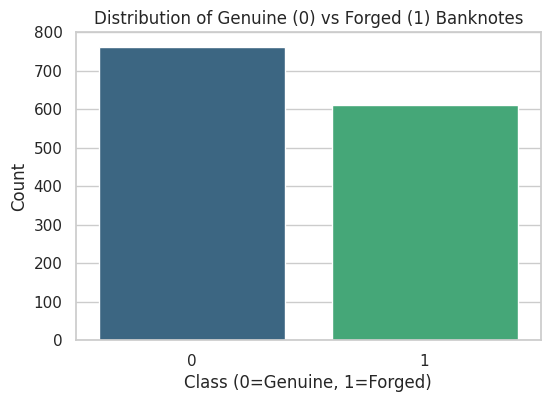

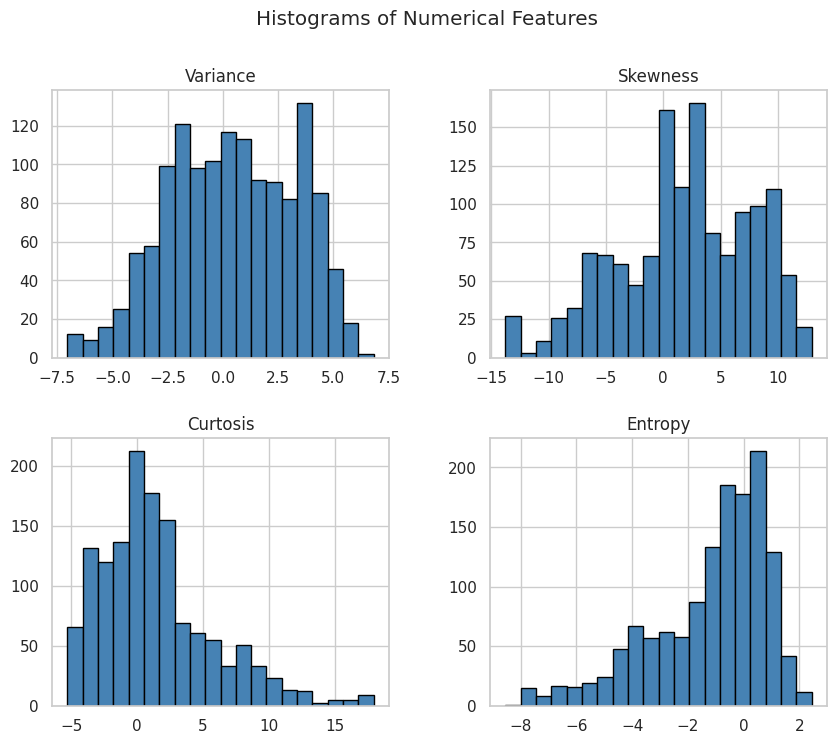

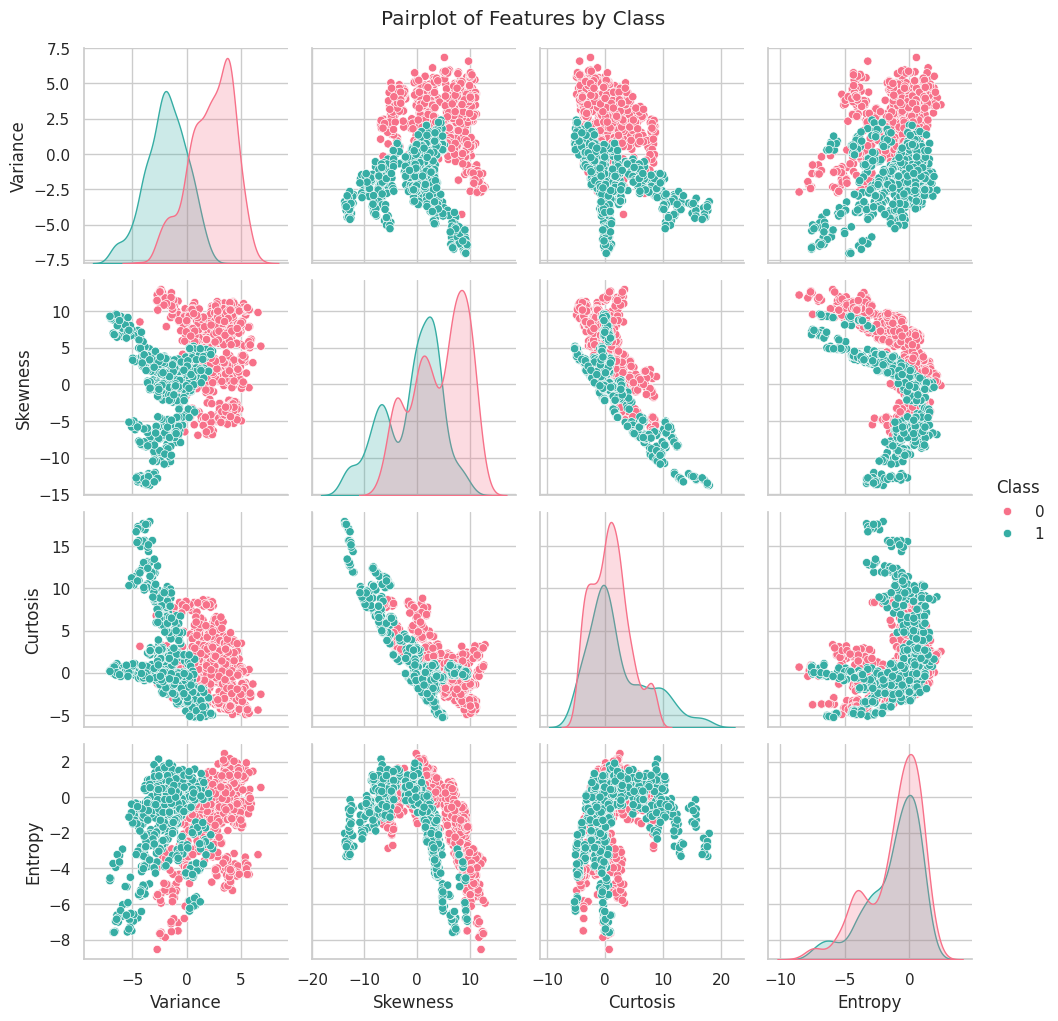

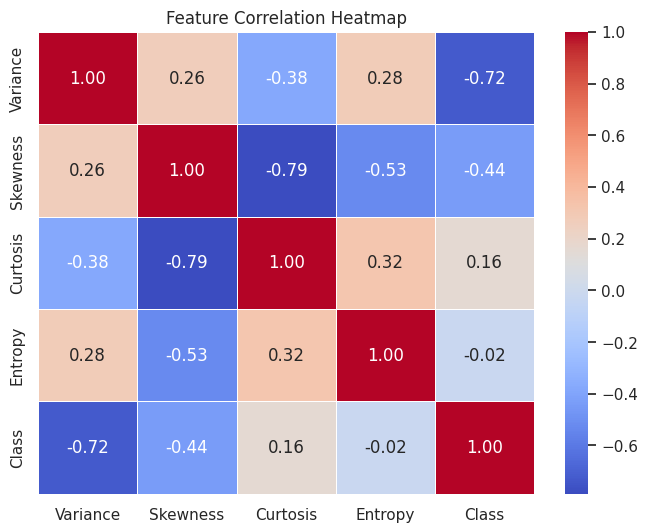


Training Set Shape: (1097, 4)
Testing Set Shape: (275, 4)

Model 1: Random Forest Classification
Accuracy: 0.9927
Confusion Matrix:
 [[148   0]
 [  2 125]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       148
           1       1.00      0.98      0.99       127

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275

Feature Importances:
     Feature  Importance
0  Variance    0.565090
1  Skewness    0.227587
2  Curtosis    0.153028
3   Entropy    0.054295

Model 2: Linear Regression
Mean Squared Error (MSE): 0.0335
R-squared (R2): 0.8652
Implied Classification Accuracy (Threshold 0.5): 0.9782


In [2]:
# --- IMPORTS ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (accuracy_score, classification_report,
                             confusion_matrix, mean_squared_error, r2_score)

# TASK 1 : DATA PREPROCESSING AND EXPLORATION

# 1. Load the dataset
df = pd.read_csv('bill_authentication.csv')

# 2. Inspect the Data
print("--- Data Overview ---")
print(df.head())
print("\n--- Data Info ---")
print(df.info())
print("\n--- Summary Statistics ---")
print(df.describe())

# 3. Check for missing values
print("\n--- Missing Values ---")
print(df.isnull().sum())

# 4. Exploratory Data Analysis (EDA) & Visualization
sns.set(style="whitegrid")

# Target Variable Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df, palette='viridis')
plt.title('Distribution of Genuine (0) vs Forged (1) Banknotes')
plt.xlabel('Class (0=Genuine, 1=Forged)')
plt.ylabel('Count')
plt.show()

# Histograms of Feature Variables
df.drop('Class', axis=1).hist(bins=20, figsize=(10, 8), color='steelblue', edgecolor='black')
plt.suptitle('Histograms of Numerical Features')
plt.show()

# Pairplot to see relationships and separation
sns.pairplot(df, hue='Class', palette='husl', diag_kind='kde')
plt.suptitle('Pairplot of Features by Class', y=1.02)
plt.show()

# Correlation Heatmap
plt.figure(figsize=(8, 6))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

# TASK 2: MACHINE LEARNING MODEL IMPLEMENTATION

# 1. Split the dataset into features (X) and target (y)
X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining Set Shape: {X_train.shape}")
print(f"Testing Set Shape: {X_test.shape}")

# Random Forest Classification
print("\nModel 1: Random Forest Classification")

# Initialize and train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate Performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

print(f"Accuracy: {accuracy_rf:.4f}")
print("Confusion Matrix:\n", conf_matrix_rf)
print("Classification Report:\n", report_rf)

# Feature Importance
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)
print("Feature Importances:\n", feature_importances)


# Linear Regression
print("\nModel 2: Linear Regression")

# Initialize and train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluate Performance
mse = mean_squared_error(y_test, y_pred_lr)
r2 = r2_score(y_test, y_pred_lr)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R2): {r2:.4f}")

# If prediction > 0.5, classify as 1 (Forged), else 0 (Genuine)
y_pred_lr_class = np.where(y_pred_lr > 0.5, 1, 0)
accuracy_lr = accuracy_score(y_test, y_pred_lr_class)
print(f"Implied Classification Accuracy (Threshold 0.5): {accuracy_lr:.4f}")